In [159]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from PIL import Image



from keras.models import Sequential
from keras.layers import Dense,Input

from keras.utils import to_categorical
from keras.datasets import fashion_mnist

In [160]:
data = fashion_mnist.load_data()
data 

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [161]:
(x_train, y_train), (x_test, y_test) = data
x_train.shape , x_test.shape

((60000, 28, 28), (10000, 28, 28))

1


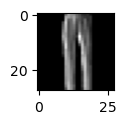

In [162]:
P = 2564
plt.figure(figsize=(1,1))
plt.imshow(x_train[P],cmap='gray');
print(y_train[P])

In [163]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [164]:
y_train_on = to_categorical(y_train)
y_test_on = to_categorical(y_test)
y_train_on , y_test_on

(array([[0., 0., 0., ..., 0., 0., 1.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([[0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]))

In [165]:
x_train_vec = x_train.reshape(60000,-1)/255
x_test_vec = x_test.reshape(10000,-1)/255

In [166]:
print(x_train_vec.max(), x_train_vec.min())

1.0 0.0


In [167]:
(x_train_vec.shape[1]+(len(np.unique(y_train))))/2

397.0

In [168]:
model = Sequential()

model.add(Input(shape=(x_train_vec.shape[1],)))

# لایه اول
model.add(Dense(x_train_vec.shape[1],activation='relu'))

# لایه هیدن
model.add(Dense(256,activation='relu'))

# لایه اخر
model.add(Dense(len(np.unique(y_train)),activation="softmax"))

model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 784)            │       615,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 818,970 (3.12 MB)

 Trainable params: 818,970 (3.12 MB)

 Non-trainable params: 0 (0.00 B)

In [169]:
model.compile('adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [170]:
res = model.fit(x_train_vec,y_train_on,epochs=2,validation_data=(x_test_vec,y_test_on))

Epoch 1/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 12ms/step - accuracy: 0.7903 - loss: 0.5884 - val_accuracy: 0.8405 - val_loss: 0.4463
Epoch 2/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.8658 - loss: 0.3651 - val_accuracy: 0.8676 - val_loss: 0.3709


In [171]:
np.random.uniform(1,255,(8*8))

array([137.36150314, 237.71974923, 204.02413936,  47.67778487,
       175.00523567,  82.62183146, 126.6438191 ,  44.13023539,
       167.20829016, 180.84607842, 209.8962327 , 211.56646628,
       143.64913235, 136.34425488,  36.69000139,  86.09062975,
       243.58939886,  95.55060845,   9.54303887, 227.30101393,
        90.72048358, 149.768762  , 107.13606654,  45.39439096,
        63.97622523, 232.70946015,   9.35299605,  77.60072092,
       180.47127689, 161.45516047, 181.22229805, 239.94884715,
       133.92358542, 183.84970113,  48.78097978, 210.42993813,
       188.95115005, 172.41446628,  47.79115043,  63.3745508 ,
        37.7874402 , 141.80212731, 188.06164318, 168.23296881,
        84.83158896, 222.50483845, 192.38384874,   3.15656425,
       127.82526572, 173.92870937, 173.22777013, 196.89030405,
         2.38333102,   6.32543813, 135.296149  , 223.5511805 ,
        12.18903427, 112.49263287,  82.74769601, 211.01949866,
        40.24014828, 233.81245472,  12.62379279, 108.79

In [172]:
np.random.uniform(1,255,(8*8))

array([ 35.17040283, 117.18385861, 141.73092668, 100.49541097,
        48.23331953,   8.95324929, 135.64227337, 147.67921181,
        66.9568304 , 254.04607042, 249.72691481,  62.77632106,
       237.21306006,  80.6562299 , 170.92659471,  17.60499661,
       202.51962424, 198.86227078, 106.94285694,  59.40358891,
       157.14095331, 234.72649057,  97.75728359,  28.66853349,
       148.92889533, 238.16586779, 247.93857067, 170.24239169,
        22.87172208, 147.06377623,  34.70749361,  69.23706875,
       101.70238445, 115.30876759, 144.59791898,  54.33081494,
       130.56191272, 232.72239287,  54.54474509, 243.74295563,
        53.59092783,  47.82671326, 109.74036481, 110.64163479,
       124.20290827, 153.82416115, 245.42896942,  70.17755842,
       168.37566245,  41.46671079, 186.67676731, 175.7959815 ,
        14.15974207, 132.11828006, 182.42070265, 136.04142646,
         9.76181622,  47.60117645, 222.21657811, 231.65088869,
       161.83023377, 227.17584885, 230.28333237, 253.42

In [173]:
pe = 235

In [174]:
model.predict(x_test_vec[pe].reshape(1,-1)).argmax()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


0

In [175]:
y_test_on[pe].argmax()

0

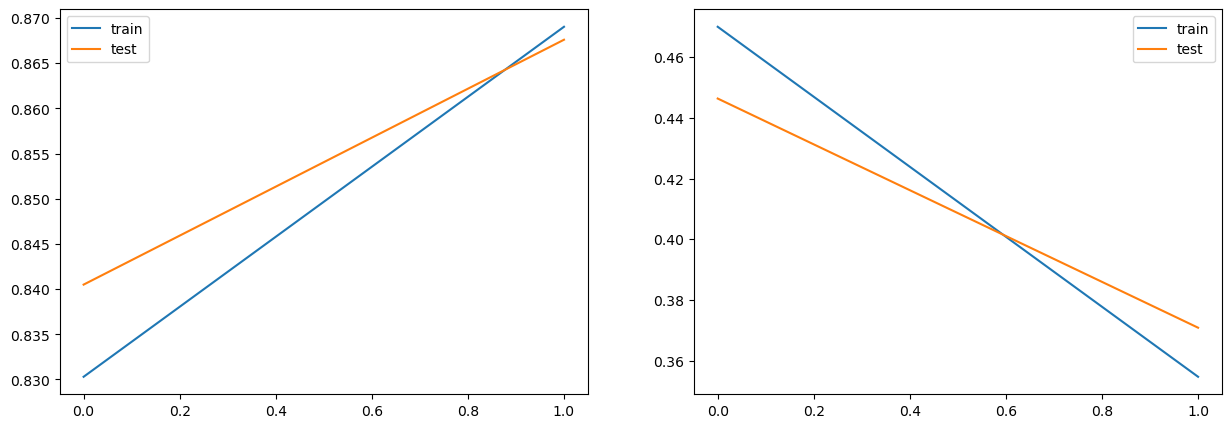

In [176]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(res.history['accuracy'])
plt.plot(res.history['val_accuracy'])
plt.legend(['train','test'])
plt.subplot(1,2,2)
plt.plot(res.history['loss'])
plt.plot(res.history['val_loss'])
plt.legend(['train','test']);

In [178]:
model.save('model_13.keras')